In [1]:
from IPython.display import Image
Image(url= "https://imgs.xkcd.com/comics/correlation.png")

# Introducción a Machine Learning con scikit-learn y seaborn

El objetivo principale de Machine Learning (ML) es predecir el comportamiento futuro de elementos medibles de la realidad a partir de información incompleta e incierta.

Las condiciones de información incompleta e incierta hacen que modelos de las ciencias naturales no sean 
aplicables. Por eso gran parte de los métodos de ML estarán basados en intuiciones estadísticas y métodos 
computacionales.

Ejemplos de problemas que caen en el área de ML son:

- Predecir el comportamiento de un comprador a partir de información de compras anteriores.
- Predecir la existencia de una enfermedad a partir de algunos resultados de exámenes médicos.
- Predecir el éxito de una película a partir de información de sus actores, productores y tema principal.
- Predecir el valor de venta de una casa a partir de características del barrio en el que se encuentra.
- Predecir la siguiente palabra que alguien va a escribir en un editor de texto a partir de las palabras que ha escrito.

[`scikit-learn`](http://scikit-learn.org/stable/) es una librería de python que contiene herramientas sencillas y eficientes para explorar datos
y construir diferentes tipos de modelos predictivos. Las tareas que realiza esta librería se pueden 
clasificar en tres áreas diferentes:

- Clasificación: Identificar la categoría a la que corresponde un individuo.
- Regresión: Predecir el valor de una variable a partir de propiedades de un individuo.
- Agrupamiento: Encontrar conjuntos de individuos que comparten características similares.

Para lograr elegir los mejores métodos posibles de clasificación, regresión y agrupamiento esta libreria ofrece
rutinas de:

- Preprocesamiento: Transformación de los datos de entrada a condiciones digeribles por algoritmos de ML.
- Reducción de dimensionalidad: Transformación de los datos de entrada para reducir el número de variables a considerar.
- Selección de Modelos: comparar y validar diferentes modelos para elegir los mejores de acuerdo a algún objetivo
deseado.

En este notebook vamos a explorar un método de **Regresión** para predecir el precio de una casa dada información
sobre su barrio. Asi mismo vamos a usar `pandas` y `seaborn` para la primera parte de digestion y exploracion de los datos.

El problema que vamos a intentar resolver es la prediccion del valor de venta de una casa a partir de características del barrio en el que se encuentra.

 # Boston Dataset
 
 `scikit-learn` cuenta con conjuntos de datos populares en la comunidad ML. 
 Uno de ellos es el Boston dataset que describe el precio de diferentes 
 casas en Boston así como diferentes informaciones sobre el barrio en el que
 se encuentra la casa

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
print(boston.keys())

dict_keys(['feature_names', 'DESCR', 'data', 'target'])


Esta es la descripcion de los datos. Por favor leanla en detalle!

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# Exploración con Seaborn y Pandas

El primer paso obligado con un conjunto de datos es el de exploración, para eso vamos a usar `pandas` y `seaborn`
para hacer las graficas.

In [6]:
import seaborn as sns
import pandas as pd

In [7]:
boston_df = pd.DataFrame(boston.data, columns=boston['feature_names'])
boston_df = boston_df.assign(PRICE=boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


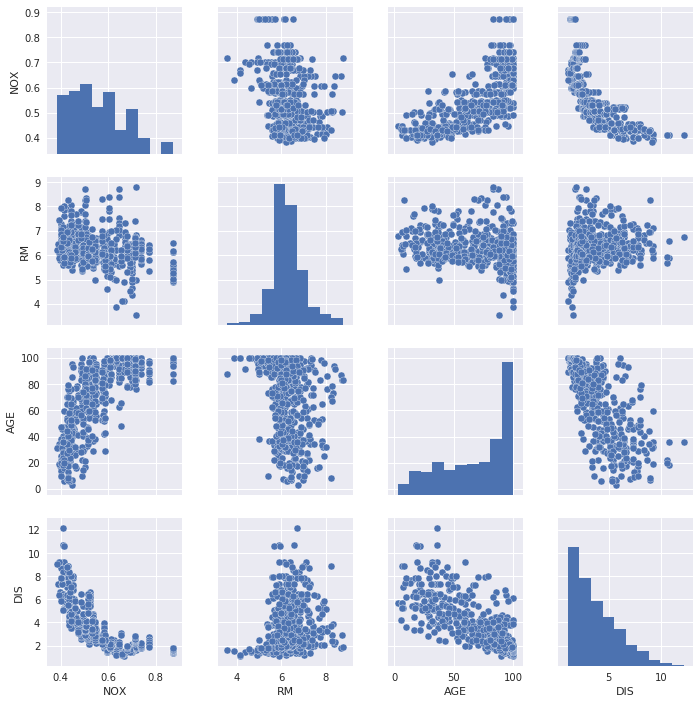

In [8]:
sns.pairplot(boston_df, vars=['NOX' ,'RM' ,'AGE' ,'DIS'])

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


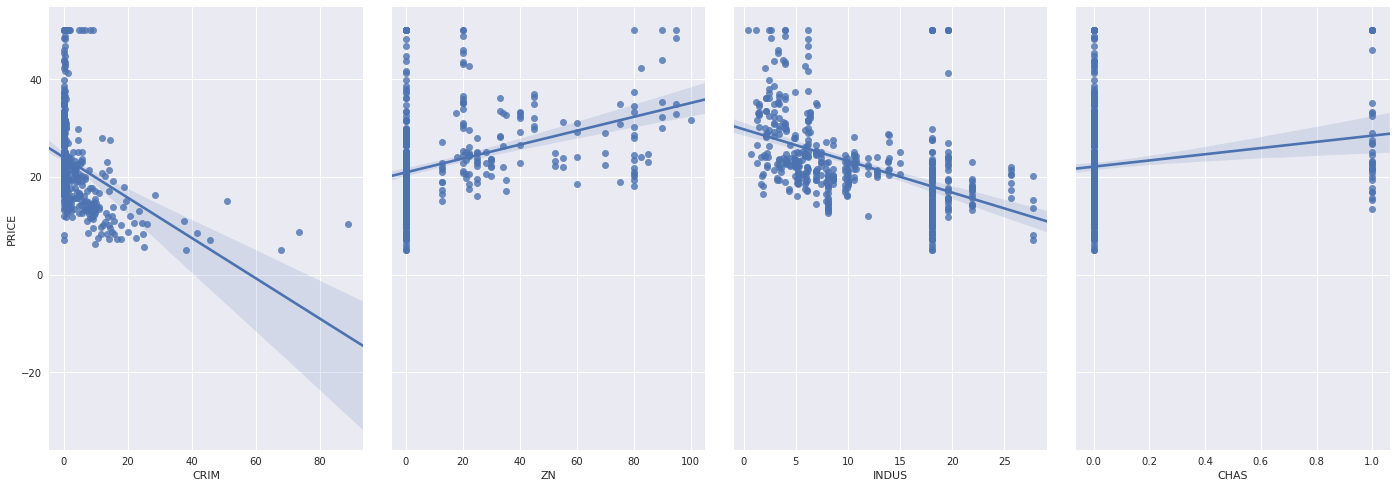

In [9]:
sns.pairplot(boston_df, x_vars=['CRIM' ,'ZN' ,'INDUS', 'CHAS'], y_vars='PRICE',size=7, aspect=0.7, kind='reg')

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


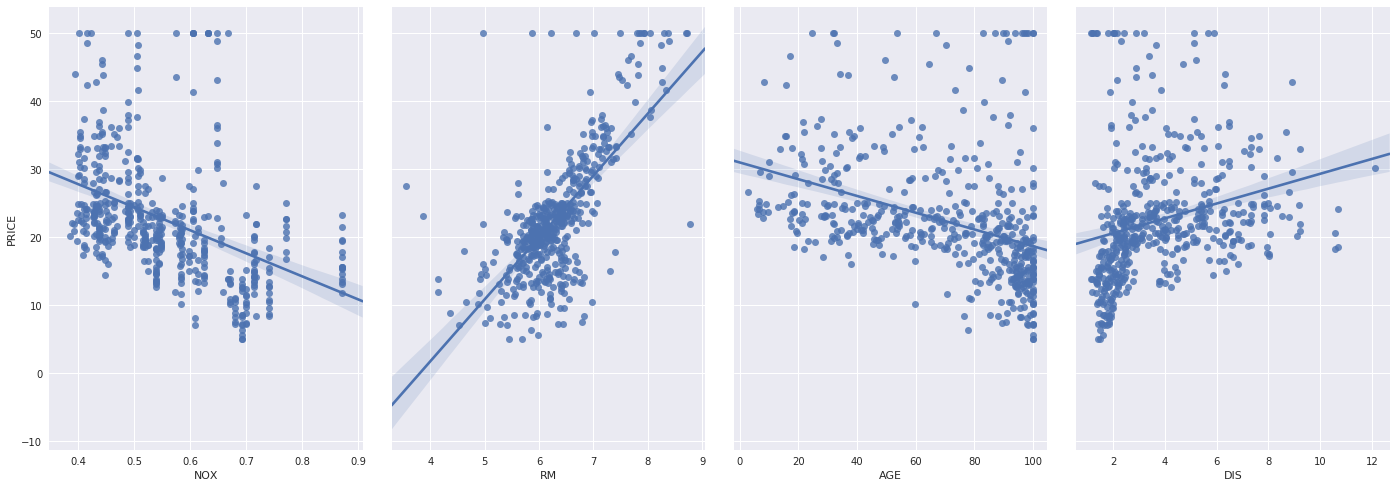

In [10]:
sns.pairplot(boston_df, x_vars=['NOX' ,'RM' ,'AGE' ,'DIS'], y_vars='PRICE',size=7, aspect=0.7, kind='reg')

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


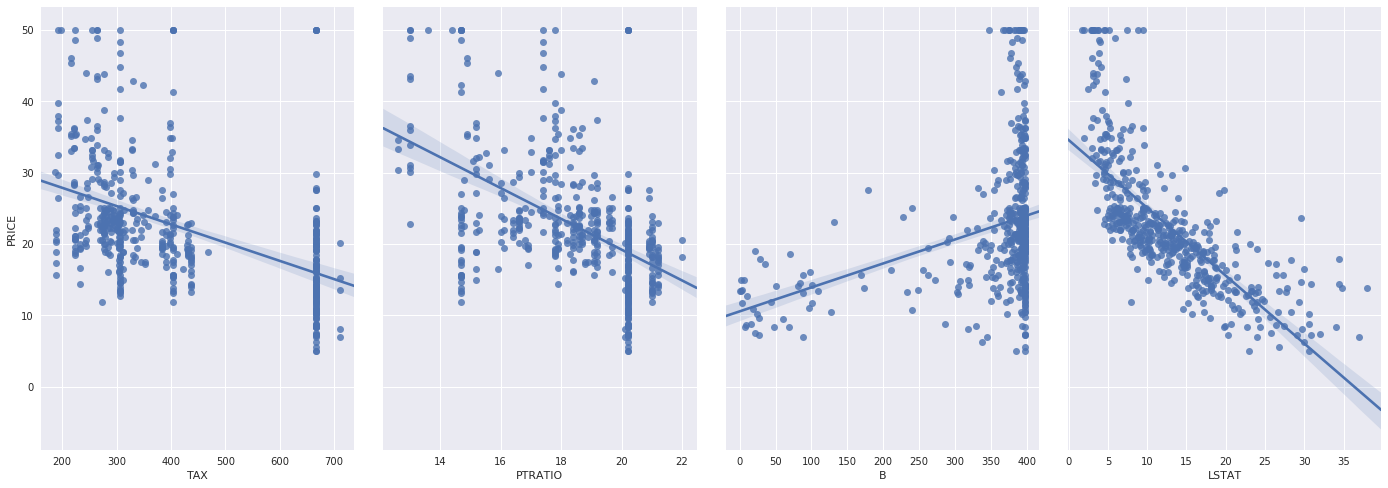

In [11]:
sns.pairplot(boston_df, x_vars=['TAX' ,'PTRATIO', 'B', 'LSTAT'], y_vars='PRICE',size=7, aspect=0.7, kind='reg')


# Elección del modelo

Hemos hecho énfasis hasta ahora en la capacidad de *predecir*. Esto implica que solamente en el futuro, cuando tengamos nuevas mediciones, podremos saber que tan acertado es nuestro modelo. 

¿Cómo podemos saber ahora mismo si nuestra capacidad de predicción es buena?
Una metodología clásica es subdividir el conjunto total de datos llamados `training` y `test`.
Los datos de `training` nos van a servir para entrenar nuestro modelo predictivo, 
mientras que los datos del `test` van a jugar el rol de observaciones futuras y nos van a dar una 
idea es que tan buena es nuestra predicción.

Para ilustrar esto vamos a simplificar el problema anterior. Vamos a suponer que el precio
de las casas solamente es función de LSTAT, el porcentaje de la población que es de clase baja.
Y además vamos a suponer que esta es una relación lineal, es decir

$$
PRICE = \beta_0+(\beta_1 \times LSTAT) 
$$

donde podemos pensar que esto corresponde a un modelo general
$$
Y = \beta_0+(\beta_1 \times X_1) 
$$

donde $\beta_0$ y $\beta_1$ son números que debemos encontrar a partir de los datos de `training`. 

Para empezar vamos a usar scikit-learn para dividir los datos en los subconjuntos de training y test.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston_df['LSTAT'], boston_df['PRICE'], test_size=0.25)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379,), (127,), (379,), (127,))

Ahora vamos a ajustar el modelo lineal a estas dos variables, para esto traemos el modulo `linear_model`

In [14]:
from sklearn import linear_model

`sklearn` cuenta con al menos 15 algoritmos diferentes para hacer esta regresion lineal ([detalles](http://scikit-learn.org/stable/modules/linear_model.html)).

Nosotros vamos a utilizar el más sencillo: `LinearRegression`, que corresponde a mínimos cuadrados.
Para esto inicializamos una instancia (`regresion`) de la clase `LinearRegression`

In [15]:
regresion = linear_model.LinearRegression()

La clase `LinearRegression` tiene un metodo llamado `fit` que hace la regresion lineal

In [16]:
#.values.reshape es necesario para datos unidimensionales
regresion.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ahora todos los coeficientes de la regresion se encuentran como atributos de `regresion`

In [17]:
regresion.intercept_, regresion.coef_ # beta_0 = intercept, beta_1=coef_

(array([ 34.16713308]), array([[-0.91919518]]))

Ahora podemos recuperar $\beta_0$ y $\beta_1$:

In [18]:
beta_0 = regresion.intercept_[0]
beta_1 = regresion.coef_[0,0]

Con esto podemos usar los datos de `test` para predecir los precios y compararlo con la realidad, donde la realidad corresponde a los valores de `PRICE` que tenemos en `Y_test`

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


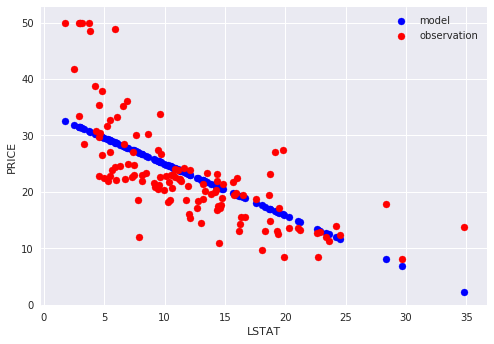

In [19]:
Y_predict = beta_0 + beta_1 * X_test
plt.scatter(X_test, Y_predict, c='blue', label='model')
plt.scatter(X_test, Y_test, c='red', label='observation')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend()

# Cuantificando la calidad de la prediccion

Es el momento de cuantificar que tan buena es nuestra prediccion.
Para esto vamos a utilizar la metrica `explained variance`

$$
{\tt explained\ variance}(y_{true} , y_{model}) = 1 - \frac{Var(y_{true}-y_{model})}{Var(y_{true})}
$$

Si nuestros datos predicen perfectamente las observaciones, tenemos que esta metrica vale `1`. 
Que significa un valor de `explained_variance=0`? y no de `explained_variance<0`?

In [20]:
from sklearn.metrics import explained_variance_score

In [21]:
ev = explained_variance_score(Y_test, Y_predict)
print(ev)

0.514347461429


# Un modelo lineal mas complejo

Ahora vamos a intentar un modelo mas complejo donde
$$
PRICE = \beta_0 + (\beta_1\times LSTAT) + (\beta_2\times NOX)
$$

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_df[['LSTAT', 'NOX']], 
                                                    boston_df['PRICE'], test_size=0.25)

In [23]:
regresion.fit(X_train,Y_train.values.reshape(-1,1)) 
regresion.intercept_, regresion.coef_ # beta_0 = intercept, beta_1=coef_

(array([ 33.18972439]), array([[-1.0153129 ,  3.91107092]]))

Ahora podriamos calcular `Y_predict` como sigue

In [24]:
beta_0 = regresion.intercept_[0]
beta_1 = regresion.coef_[0,0]
beta_2 = regresion.coef_[0,1]
Y_predict = beta_0 + beta_1 * X_test['LSTAT'] + beta_2 * X_test['NOX']

Pero en realidad es suficiente utilizar el metodo `predict`

In [25]:
Y_predict = regresion.predict(X_test)

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


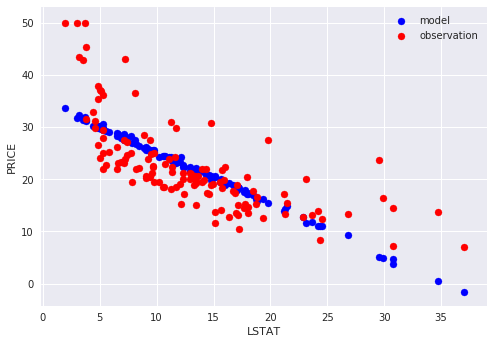

In [26]:
plt.scatter(X_test['LSTAT'], Y_predict, c='blue', label='model')
plt.scatter(X_test['LSTAT'], Y_test, c='red', label='observation')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend()

/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


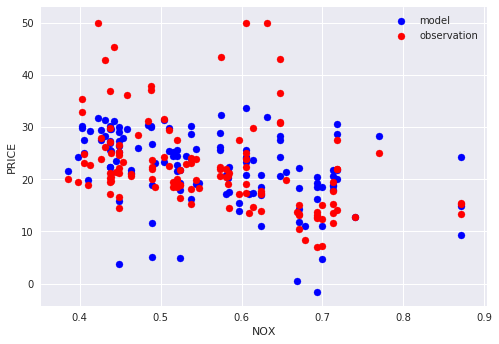

In [27]:
plt.scatter(X_test['NOX'], Y_predict, c='blue', label='model')
plt.scatter(X_test['NOX'], Y_test, c='red', label='observation')
plt.xlabel('NOX')
plt.ylabel('PRICE')
plt.legend()

# Son significativas las diferencias entre modelos?

Podemos calcular `ev` para el caso de las regresion con dos variables

In [28]:
ev = explained_variance_score(Y_test, Y_predict)
print(ev)

0.493970278654


En principio podriamos utilizar `ev` para preferir el modelo que solo depende de `LSTAT` a uno que depende
de `LSTAT` y `NOX`, si `ev` fuera mayor en el primer caso.

Pero debemos tener **cuidado porque `ev` es una variable aleatoria**.
Es decir, si hago diferentes cortes `training`, `test` puedo tener respuestas diferentes. Es decir:

In [29]:
n_intentos = 100
ev_array = np.ones(n_intentos)
for i in range(n_intentos):
    X_train, X_test, Y_train, Y_test = train_test_split(boston_df[['LSTAT', 'NOX']], 
                                                    boston_df['PRICE'], test_size=0.25)
    regresion.fit(X_train,Y_train.values.reshape(-1,1)) 
    Y_predict = regresion.predict(X_test)
    ev = explained_variance_score(Y_test, Y_predict)
    ev_array[i] = ev


/home/forero/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


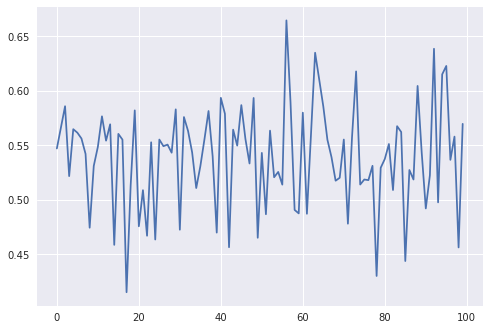

In [30]:
plt.plot(ev_array)

Ahora vamos a encontrar el par de variables que mejor predicen `PRICE` (**Ejercicio 7**). 
Pero los recomendamos que vayan haciendo los ejercicios anteriores para paso a paso para que 
vayan entrenando sus habilidades de `sckit-learn` y su intucion sobre el problema que tenemos a mano.

## Ejercicio 1

Haga la regresion lineal de `PRICE` utilizando solamente la variable `RM`.
Repita la grafica de `model` vs. `observation`

## Ejercicio 2

Calcule `ev` para la regresion lineal hecha con la variable `RM`.

## Ejercicio 3

Haga una regresion lineal de `PRICE` como funcion lineal variables `ZN` y `CRIM`. 
- Grafique `PRICE` vs `CRIM` y `PRICE` vs `ZN`
- Calcule `ev` para este modelo.

## Ejercicio 4
Para decidir si el modelo de `PRICE` en funcion de `[ZN,CRIM]` es mejor que el modelo en funcion de `[LSTAT, NOX]` vamos a hacer un tornedo entre los dos modelos. Los torneos tienen `100` rondas de comparacion.

Para una ronda, haga la regresion con `[ZN,CRIM]` y calcule `ev_1` para este modelo. Luego haga la regresion con `[LSTAT, NOX]` y calcule `ev_2` para este modelo. Si `ev_1` es mayor que `ev_2` el primer modelo gano esta primera ronda comparacion.

Repita esta misma comparacion `100` veces (cada vez creando nuevos conjuntos de `test`/`training`) y cuente cuantas comparaciones gano cada uno de los modelos.

Vamos a decir que el modelo que gano mayor cantidad de comparaciones es el mejor en predecir `PRICE`.

## Ejercicio 5

Con el mismo procedimiento anterior vamos a hacer un torneo de 100 rondas de comparacion para elegir el mejor de los modelos 
entre `[LSTAT, NOX]`, `[NOX, INDUS]` y `[AGE, RM]`. Esta vez en cada ronda gana el modelo con el maximo `ev`.

Escriba los 3 modelos en orden decreciente del numero de rondas ganadas.

Asi mismo para cada modelo, ademas del numero de competencias ganadas, escriba el promedio y desviacion estandar de `ev` **calculado sobre los 100 valores todas las rondas**.

## Ejercicio 6

Cree una lista que contenga todas las combinaciones de pares de variables en el `dataset`. 
La lista no debe contener los duplicados del tipo `[LSTAT,NOX]` y `[NOX,LSTAT]`, en ese caso solamente
uno de los dos pares debe estar en la lista.

Hay 13 parametros, asi que la lista debe tener $(13\times 12)/2=78$ items.

## Ejercicio 7

Ahora el torneo tiene los 78 competidores de la lista anterior. Haga 500 rondas de comparacion y calcule el numero 
de veces que cada modelo gana. Finalmente, escriba los modelos en orden decreciente de numero de rondas ganadas junto a su valor promedio de `ev` sobre las 500 rondas.

Finalmente, cual es el par de variables que mejor describe los datos?

# Futuro
Pero esto es solamente el comienzo

In [31]:
Image(url= "https://sciencedryad.files.wordpress.com/2014/01/scikit-learn-algorithmcheatsheet.png")